# Monte Carlo integration

Imagine that we want to measure the area of a pond with arbitrary shape. Suppose that this pond is in the middle of a field with known area $A$. If we throw $N$ stones randomly, such that they land within the boundaries of the field, and we count the number of stones that fall in the pond $N_{in}$, the area of the pond will be approximately proportional to the fraction of stones that make a splash, multiplied by $A$: $$A_{pond}=\frac{N_{in}}{N}A.$$ This simple procedure is an example of the “Monte Carlo” method.
Simple Monte Carlo integration

More generaly, imagine a rectangle of height $H$ in the integration interval $[a,b]$, such that the function $f(x)$ is within its boundaries. Compute $n$ pairs of random numbers $(x_i,y_i)$ such that they are uniformly distributed inside this rectangle. The fraction of points that fall within the area contained below $f(x)$, *i. e.*, that satisfy $y_i \leq f(x_i)$ is an estimate of the ratio o fthe integral of $f(x)$ and the area of the rectangle. Hence, the estimate of the integral will be given by: $$\int _a^b{f(x)dx} \simeq I(N) = \frac{N_{in}}{N}H(b-a). $$


## Example: One dimensional integration

- Write a program that implements the “hit and miss” Monte Carlo integration algorithm. Find the estimate $I(N)$ for the integral of $$f(x)=4\sqrt{1-x^2}$$ as a function of $N$, in the interval $(0,1)$. Choose $H=1$, and sample only the $x$-dependent part $\sqrt{1-x^2}$, and multiply the result by 4. Calculate the difference between $I(N)$ and the exact result $\pi$. This difference is a measure of the error associated with the Monte Carlo estimate. Make a log-log plot of the error as a function of $N$. What is the approximate functional deppendece of the error on $N$ for large $N$?

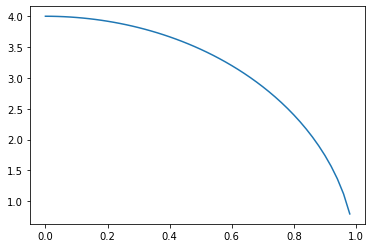

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

x = np.arange(0,1,0.02)
pyplot.plot(x, 4*np.sqrt(1-x**2))

100 78 3.12 0.02159265358979301
200 154 3.08 0.061592653589793045
400 305 3.05 0.0915926535897933
800 614 3.07 0.07159265358979328
1600 1239 3.0975 0.044092653589792974
3200 2523 3.15375 0.012157346410206937
6400 4984 3.115 0.026592653589792903
12800 10032 3.135 0.006592653589793329
25600 19977 3.12140625 0.020186403589792956
51200 40178 3.13890625 0.002686403589793329
102400 80374 3.139609375 0.0019832785897930805
204800 160974 3.1440234375 0.0024307839102069018
409600 321208 3.136796875 0.004795778589793187
819200 643771 3.1434130859375 0.0018204323477069018
1638400 1286639 3.14120849609375 0.0003841574960432581


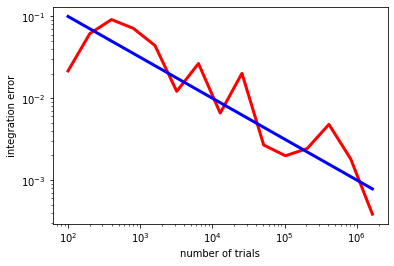

In [10]:
# Hit and miss Monte Carlo integration
ngroups = 15

#set up arrays to save results
#number of draws
N = np.zeros(ngroups)
#estimate for the integral
I = np.zeros(ngroups)
#error of this particular estimate
E = np.zeros(ngroups)

#start with 100 draws
n0 = 100
for i in range(ngroups):
    #save n0 in N
    N[i] = n0
    # generate n0 random points
    x = np.random.random(n0)
    y = np.random.random(n0)
    I[i] = 0.
    Nin = 0
    #now check how many these points are below the curve
    for j in range(n0):
        if(y[j] < np.sqrt(1-x[j]**2)):
            Nin += 1
    #now estimate integral based on fraction of points accepted and size of the rectangle
    I[i] = 4.*float(Nin)/float(n0)
    E[i] = abs(I[i]-np.pi)
    print (n0,Nin,I[i],E[i])
    n0 *= 2
    
#plot results            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,1.0/np.sqrt(N),ls='-',c='blue',lw=3);
pyplot.xlabel('number of trials')
pyplot.ylabel('integration error')
pyplot.xscale('log')
pyplot.yscale('log')

## Exercise
- 2D Monte Carlo: Compute estimates of $\pi$ by evaluating the area of the unit disk $x^2+y^2<=1$ using Monte Carlo Integration with varying $N$, and make a log-log plot of the error as a function of $N$.
- 3D Monte Carlo: Now estimate the volume of the unit ball defined by $x^2+y^2+z^2<=1$, and make a log-log plot of the error as a function of $N$.
- How does the error of Monte Carlo Integration scale with dimension?